In [2]:
%matplotlib inline 
import pandas as pd

In [ ]:
from IPython.core.display import HTML 
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles= pd.read_csv('titles.csv')
titles.head()


,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
cast=pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


Using groupby(), plot the number of films that have been released each decade in the history of cinema.

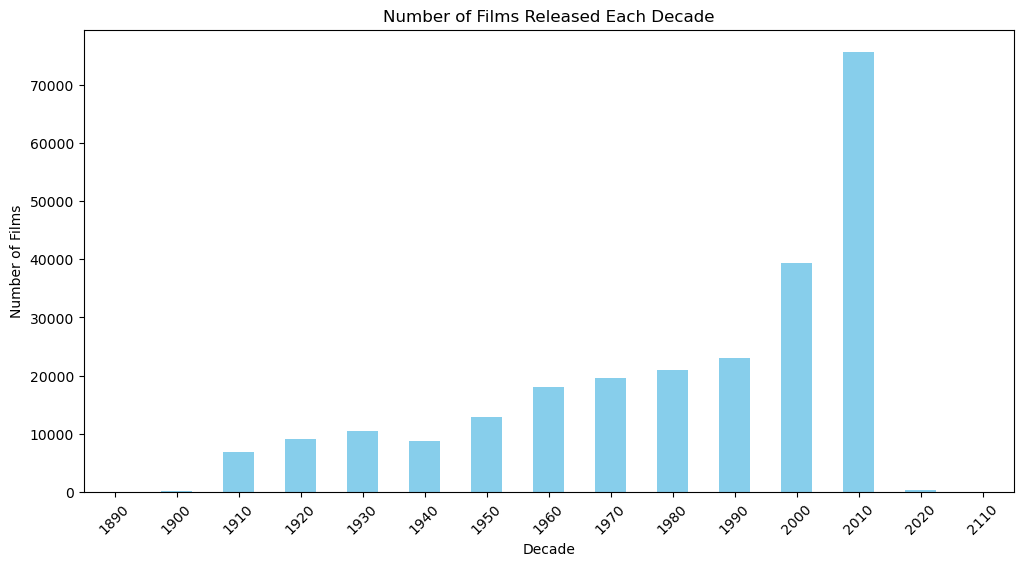

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the titles DataFrame
titles = pd.read_csv('titles.csv')

# Extract the decade from the 'year' column
titles['decade'] = (titles['year'] // 10) * 10

# Group the data by decade and count the number of films
film_counts_by_decade = titles.groupby('decade').size()

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
film_counts_by_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Use groupby() to plot the number of "Hamlet" films made each decade.

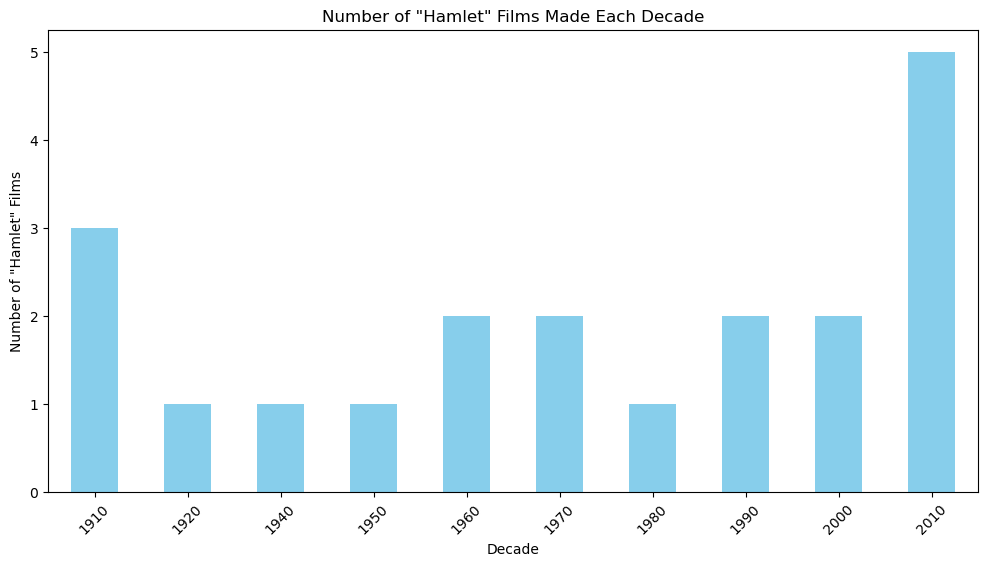

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the titles DataFrame
titles = pd.read_csv('titles.csv')

# Extract the decade from the 'year' column
titles['decade'] = (titles['year'] // 10) * 10

# Filter the data for films with the title "Hamlet"
hamlet_films = titles[titles['title'] == 'Hamlet']

# Group the filtered data by decade and count the number of "Hamlet" films
hamlet_counts_by_decade = hamlet_films.groupby('decade').size()

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
hamlet_counts_by_decade.plot(kind='bar', color='skyblue')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.show()


How many leading (n=1) roles were available to actors, and how

many to actresses, in each year of the 1950s?

In [9]:


# Filter for rows where the year is in the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the data by year, type (actor/actress), and n-value, and count the number of roles
leading_roles_counts = roles_1950s[roles_1950s['n'] == 1].groupby(['year', 'type'])['n'].count()


print("Number of leading (n=1) roles available to actors and actresses in each year of the 1950s:")
print(leading_roles_counts)


Number of leading (n=1) roles available to actors and actresses in each year of the 1950s:
year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
Name: n, dtype: int64


In the 1950s decade taken as a whole, how many total roles were

available to actors, and how many to actresses, for each "n" number

1 through 5?

In [10]:


roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the data by type (actor/actress) and n-value, and count the number of roles
roles_by_n_and_type = roles_1950s.groupby(['n', 'type'])['n'].count().unstack()

# Fill missing values with 0 (no roles for that combination of n and type)
roles_by_n_and_type.fillna(0, inplace=True)


print("Total roles available to actors and actresses in the 1950s for each 'n' number (1-5):")
print(roles_by_n_and_type)


Total roles available to actors and actresses in the 1950s for each 'n' number (1-5):
type    actor  actress
n                     
1.0    6692.0   3040.0
2.0    4640.0   4635.0
3.0    5654.0   3201.0
4.0    5663.0   2881.0
5.0    5674.0   2592.0
...       ...      ...
162.0     0.0      1.0
163.0     0.0      1.0
164.0     0.0      1.0
418.0     0.0      1.0
788.0     0.0      1.0

[166 rows x 2 columns]


In [ ]:
Use groupby() to determine how many roles are listed for each of the

Pink Panther movies.

In [11]:


# Filter for rows where the 'title' column contains "Pink Panther"
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]

# Group the data by the 'title' column and count the number of roles
roles_by_pink_panther_movie = pink_panther_movies.groupby('title').size()

# Display the results
print("Number of roles listed for each Pink Panther movie:")
print(roles_by_pink_panther_movie)


Number of roles listed for each Pink Panther movie:
title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64


List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:


# Filter for rows where the name is "Frank Oz"
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by title and year, and count the number of roles Frank Oz played in each film
roles_per_film = frank_oz_roles.groupby(['title', 'year']).size()

# Filter for films where Frank Oz played more than one role
films_with_multiple_roles = roles_per_film[roles_per_film > 1].reset_index()

# Sort the films by year
films_with_multiple_roles = films_with_multiple_roles.sort_values(by='year')

print("Films in which Frank Oz played more than one role, ordered by year:")
print(films_with_multiple_roles)


Films in which Frank Oz played more than one role, ordered by year:
                                  title  year  0
8                      The Muppet Movie  1979  8
0        An American Werewolf in London  1981  2
6                The Great Muppet Caper  1981  6
5                      The Dark Crystal  1982  2
9            The Muppets Take Manhattan  1984  7
1                      Follow That Bird  1985  3
7            The Muppet Christmas Carol  1992  7
2                Muppet Treasure Island  1996  4
3                    Muppets from Space  1999  4
4  The Adventures of Elmo in Grouchland  1999  3


List each of the characters that Frank Oz has portrayed at least twice

In [13]:


# Filter for rows where the name is "Frank Oz"
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by character and count the number of times Frank Oz portrayed each character
character_counts = frank_oz_roles['character'].value_counts()

# Filter for characters that Frank Oz portrayed at least twice
characters_at_least_twice = character_counts[character_counts >= 2]

# Display the result
print("Characters that Frank Oz has portrayed at least twice:")
print(characters_at_least_twice)


Characters that Frank Oz has portrayed at least twice:
Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64
